In [1]:
##!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
bmi = pd.read_csv("./bmi_500.csv", index_col='Label')
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [4]:
gender = []
for i in bmi['Gender']:
    if i =='Male':
        gender.append(1)
    else:
        gender.append(0)
bmi['Gender']= gender
bmi

,Gender,Height,Weight
Label,,,
Obesity,1,174,96
Normal,1,189,87
Obesity,0,185,110
Overweight,0,195,104
Overweight,1,149,61
...,...,...,...
Extreme Obesity,0,150,153
Obesity,0,184,121
Extreme Obesity,0,141,136


### 산점도를 통한 탐색적 분석

In [5]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label)      # label로 설정하는 명령

In [6]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

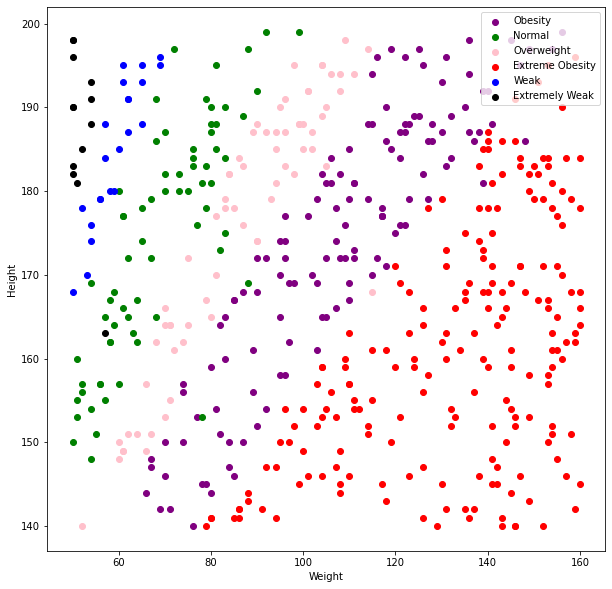

In [7]:
plt.figure(figsize=(10,10))

myScatter("Obesity","purple")
myScatter("Normal","green")
myScatter("Overweight","pink")
myScatter("Extreme Obesity","red")
myScatter("Weak","blue")
myScatter("Extremely Weak","black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [8]:
bmi = pd.read_csv("./bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [9]:
gender = []
for i in bmi['Gender']:
    if i =='Male':
        gender.append(1)
    else:
        gender.append(0)
bmi['Gender']= gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


In [10]:
# 독립변수, 종속변수 구분
X = bmi.loc[:,"Height":"Weight"]
y= bmi.loc[:,"Label"] 

In [11]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [12]:
# train-test split

X_train = X.iloc[:350,:]
y_train = y.iloc[:350]
X_test = X.iloc[350:,:]
y_test = y.iloc[350:]

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [14]:
# model선언
model = KNeighborsClassifier(n_neighbors= 10)

In [15]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
prediction = model.predict(X_test)

In [17]:
metrics.accuracy_score(prediction, y_test)

0.94

In [18]:
model.predict([[174,73]])

c:\Users\user\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

# 데이터 소개

In [19]:
#!pip install mglearn

In [20]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

In [21]:
x, y = mglearn.datasets.make_forge()

c:\Users\user\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [22]:
#from matplotlib import font_manager,rc
#font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
#rc('font',family = font_name)

In [23]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

X.shape: (26, 2)


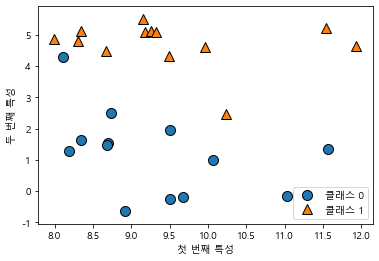

In [24]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", x.shape)
plt.show()

c:\Users\user\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


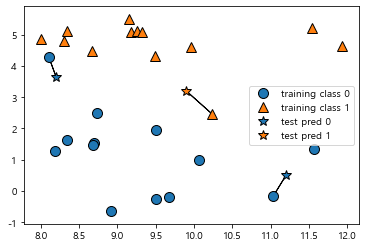

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\Users\user\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


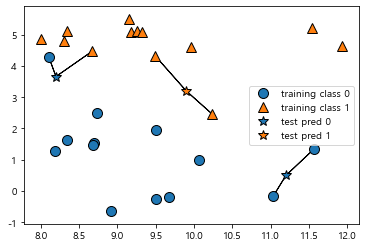

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

x, y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
#random_state : 데이터를 섞어줄때, 다음에 호출했을때도 같은 값을 받기위해 사용=같은 커널일때만 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [30]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
print('테스트 세트 예측 :', model.predict(x_test))
print('테스트 세트 정확도 : {:.2f}'.format(model.score(x_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


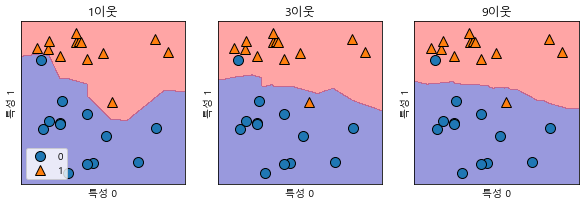

In [32]:
gif, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes) :
    
    model = KNeighborsClassifier(n_neighbors= n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(model, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

###  min-max scaler

In [39]:
data = [1,2,3,4,5,6,7,8,9,10,25,77,38.5]

In [40]:
max_value = np.max(data)
min_value = np.min(data)

min_max_scaling = []
for i in data:
    min_max_scaling.append((i-min_value)/(max_value-min_value))
    
min_max_scaling 
    

[0.0,
 0.013157894736842105,
 0.02631578947368421,
 0.039473684210526314,
 0.05263157894736842,
 0.06578947368421052,
 0.07894736842105263,
 0.09210526315789473,
 0.10526315789473684,
 0.11842105263157894,
 0.3157894736842105,
 1.0,
 0.4934210526315789]

In [42]:
from sklearn.preprocessing import MinMaxScaler
data= np.array(data)
scaler = MinMaxScaler()
scaler.fit(data.reshape(-1, 1))
scaled_data = scaler.transform(data.reshape(-1,1))
print(scaled_data)

[[0.        ]
 [0.01315789]
 [0.02631579]
 [0.03947368]
 [0.05263158]
 [0.06578947]
 [0.07894737]
 [0.09210526]
 [0.10526316]
 [0.11842105]
 [0.31578947]
 [1.        ]
 [0.49342105]]


In [ ]:
max_value = np.max(data)
min_value = np.min(data)

min_max_scaling = []
for i in data:
    min_max_scaling.append((i - min_value)/(max_value - min_value))
min_max_scaling